In [5]:
from src import PINNViga
from src import Carga
from src import Apoio
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import time
import torch
import torch.nn as nn

VIGA BIAPOIADA

In [6]:
## SEÇÃO DA VIGA

b = 0.2
h = 0.4
E = 30e9
I = b * (h ** 3) / 12
EI = E * I

In [7]:
# VIGA BIAPOIADA
# CRIANDO OS APOIOS

L = 4

## CRIANDO OS APOIOS

apoio_esq = Apoio.Apoio([1, 1, 0], [0, 0])
apoio_meio = Apoio.Apoio([1, 1, 0], [L / 2, 0])
apoio_dir = Apoio.Apoio([0, 1, 0], [L, 0])
apoio_dir2 = Apoio.Apoio([0, 1, 0], [3 * L / 2, 0])

lista_apoios = [apoio_esq, apoio_meio, apoio_dir]
lista_apoios = [apoio_esq, apoio_meio, apoio_dir, apoio_dir2]
# lista_apoios = [apoio_esq, apoio_dir]

## CRIANDO CARGAS

q = -10e3

# q2 = Carga.CargaDistribuida([0, q], [0, 0], [L, 0])
q2 = Carga.CargaDistribuida([0, q], [0, 0], [3 * L / 2, 0])

cargas = [q2]

In [8]:
## LOOP DE TREINAMENTO

biapoiada = PINNViga.PINNViga(lista_apoios, cargas, E, I)
biapoiada.run_model(num_epochs=3000, pde_weight=1, bc_weight=1, int_weight = 1, tol = 1e-10, tol_apoio=1e-10)
biapoiada.run_sol_analitica(tam = 40)

Epoch 0, Loss: 4.620200157166, PDE Loss: 4.578782081604, BC Loss: 0.023409945890, INT Loss: 0.018008338287
Epoch 300, Loss: 0.040905341506, PDE Loss: 0.011622394435, BC Loss: 0.015943825245, INT Loss: 0.013339119032
Epoch 600, Loss: 0.001600359217, PDE Loss: 0.001403837465, BC Loss: 0.000110740817, INT Loss: 0.000085780972
Epoch 900, Loss: 0.000861089327, PDE Loss: 0.000833874161, BC Loss: 0.000011306493, INT Loss: 0.000015908659
Epoch 1200, Loss: 0.000259084307, PDE Loss: 0.000254750194, BC Loss: 0.000002300180, INT Loss: 0.000002033909
Epoch 1500, Loss: 0.000151009022, PDE Loss: 0.000149533458, BC Loss: 0.000000772039, INT Loss: 0.000000703521
Epoch 1800, Loss: 0.000089840789, PDE Loss: 0.000089229041, BC Loss: 0.000000323910, INT Loss: 0.000000287835
Epoch 2100, Loss: 0.001009650296, PDE Loss: 0.000995969400, BC Loss: 0.000007795757, INT Loss: 0.000005885199
Epoch 2400, Loss: 0.000032310632, PDE Loss: 0.000032193617, BC Loss: 0.000000073523, INT Loss: 0.000000043491
Epoch 2700, Loss

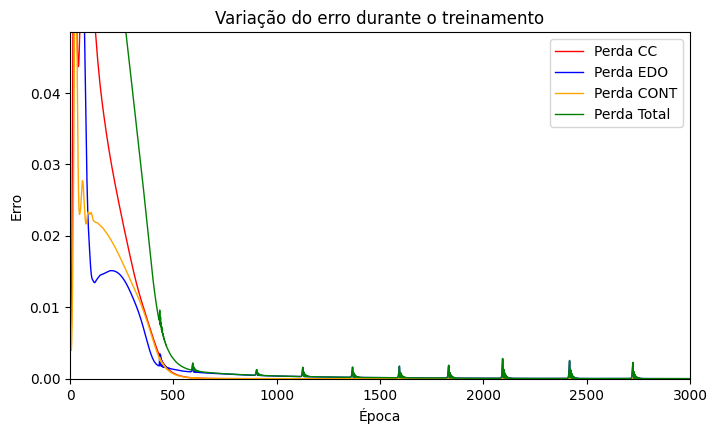

In [9]:
biapoiada.plot_errors(100)

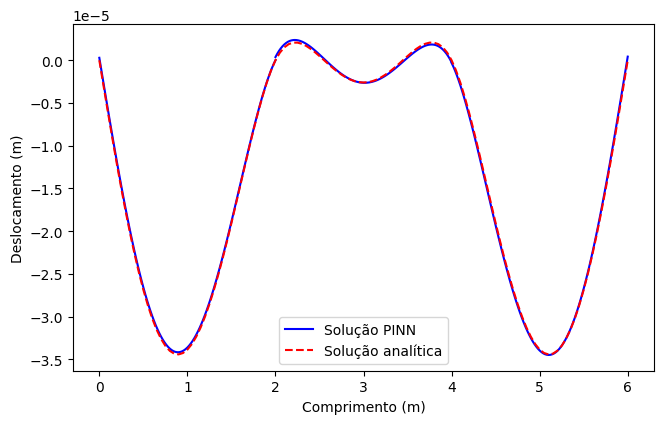

In [10]:
biapoiada.plot_deslocamento()

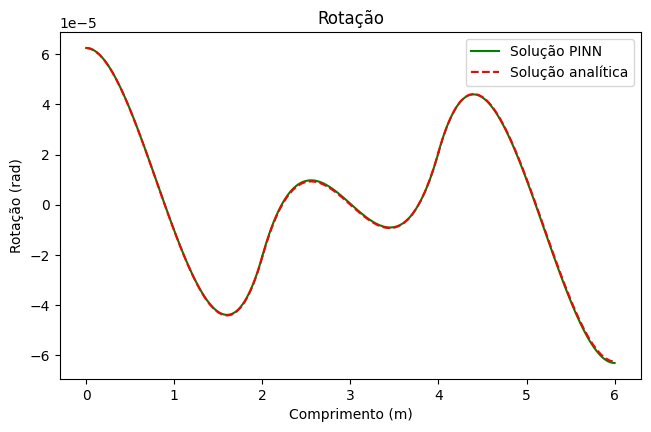

In [11]:
biapoiada.plot_rotacao()

In [12]:
vetor_x = []
for k in range(len(biapoiada.x_analitico) - 1):
    vetor_x.append([biapoiada.x_analitico[k + 1], biapoiada.x_analitico[k]])

In [13]:
# vetor_M = []
# for k, barra in enumerate(ss.get_element_results()):
#     vetor_M.append([float(-barra['Mmin']), float(-barra['Mmax'])])

# for k in range(1, len(vetor_M)):
#     if round(vetor_M[k][1], 2) != round(vetor_M[k - 1][0], 2):
#         temp = [vetor_M[k][1], vetor_M[k][0]]
#         vetor_M[k] = temp

In [14]:
# for x, M in zip(vetor_x, vetor_M):
#     plt.plot(x, M)

In [15]:
# vetor_Q = []
# for k, barra in enumerate(ss.get_element_results()):
#     vetor_Q.append([float(-barra['Qmax']), float(-barra['Qmin'])])

In [16]:
# for x, Q in zip(vetor_x, vetor_Q):
#     plt.plot(x, Q)

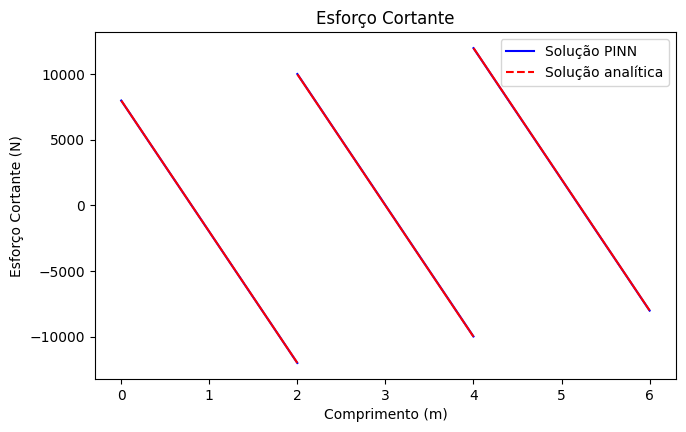

In [17]:
biapoiada.plot_cortante()

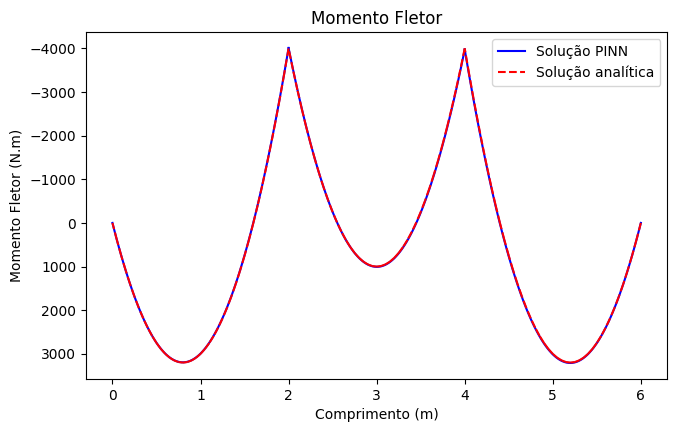

In [18]:
biapoiada.plot_momento()